In [1]:
#Lab-1 
# Study of Vector Network Analyser # Shot, Open and MAtched Boundaries # Low pass Filter
# Microwave Engineering
#Author: Manish
# Data taken by Vishu and Ishu...
#Special thanks: Sarkar and Tyagi
#kindly ignore Logarithnmic scaled graphs if they are not insighful.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
open_s11 = pd.read_csv('open_s11.csv', sep=';')

In [15]:
open_s11

,Frequency,S11-Magnitude (dB),S11-Phase (°),S12-Magnitude (dB),S12-Phase (°),S21-Magnitude (dB),S21-Phase (°),S22-Magnitude (dB),S22-Phase (°)
0,4.000000e+05,-0.023043,-0.378957,0,0,0,0,0,0
1,4.599600e+06,0.158502,0.086646,0,0,0,0,0,0
2,8.799200e+06,0.142451,0.630554,0,0,0,0,0,0
3,1.299880e+07,-0.031460,0.321059,0,0,0,0,0,0
4,1.719840e+07,0.042953,0.205701,0,0,0,0,0,0
5,2.139800e+07,0.050277,0.574812,0,0,0,0,0,0
6,2.559760e+07,0.043528,0.002403,0,0,0,0,0,0
7,2.979720e+07,0.073051,0.992582,0,0,0,0,0,0
8,3.399680e+07,-0.021021,0.354808,0,0,0,0,0,0
9,3.819640e+07,0.077260,1.245564,0,0,0,0,0,0


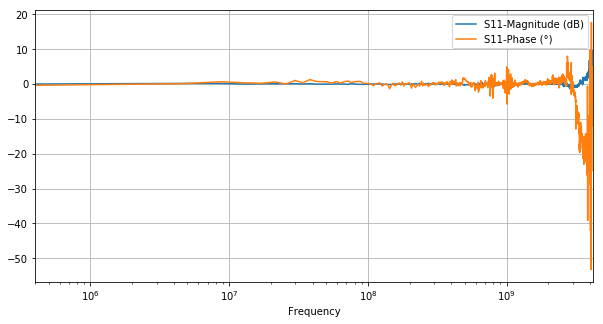

In [38]:
# plot of S vs f; x-axis in log scale.
open_s11.plot(x='Frequency', y=['S11-Magnitude (dB)', 'S11-Phase (°)'], figsize=(10,5), grid=True)
plt.xscale("log")

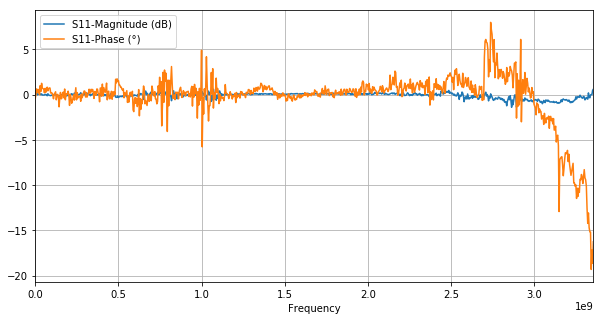

In [53]:
# plot of S vs f; x-axis in linear scale
open_s11[:800].plot(x='Frequency', y=['S11-Magnitude (dB)', 'S11-Phase (°)'], figsize=(10,5), grid=True)

In [17]:
short_s11 = pd.read_csv('short_s11.csv', sep=';')

In [18]:
short_s11

,Frequency,S11-Magnitude (dB),S11-Phase (°),S12-Magnitude (dB),S12-Phase (°),S21-Magnitude (dB),S21-Phase (°),S22-Magnitude (dB),S22-Phase (°)
0,4.000000e+05,-0.175948,-177.956328,0,0,0,0,0,0
1,4.599600e+06,-0.068634,-177.614330,0,0,0,0,0,0
2,8.799200e+06,-0.025564,-177.396544,0,0,0,0,0,0
3,1.299880e+07,-0.035771,-177.504959,0,0,0,0,0,0
4,1.719840e+07,-0.022458,-177.508990,0,0,0,0,0,0
5,2.139800e+07,-0.066072,-177.282668,0,0,0,0,0,0
6,2.559760e+07,-0.083946,-177.320764,0,0,0,0,0,0
7,2.979720e+07,-0.088045,-177.293709,0,0,0,0,0,0
8,3.399680e+07,-0.122081,-177.369501,0,0,0,0,0,0
9,3.819640e+07,-0.140286,-177.209037,0,0,0,0,0,0


In [71]:
j=0
a2=[]
for i in short_s11['S11-Phase (°)']:
    a2.append(abs(i))
    j=j+1

In [72]:
j=0
b=[]
for i in short_s11['Frequency']:
    b.append(i)
    j=j+1

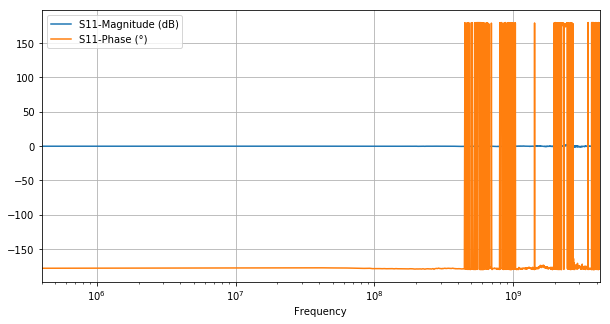

In [40]:
# plot of S vs f; x-axis in log scale.
short_s11.plot(x='Frequency', y=['S11-Magnitude (dB)', 'S11-Phase (°)'], figsize=(10,5), grid=True)
plt.xscale("log")

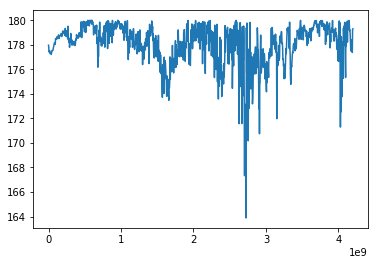

In [74]:
plt.plot(b,a2)

In [56]:
# plot of S vs f; x-axis in linear scale.
short_s11.plot(x='Frequency', y=['S11-Magnitude (dB)', 'S11-Phase (°)'], figsize=(10,5), grid=True)

ValueError: could not convert string to float: 'S11-Phase (°)'

In [19]:
load_s11 = pd.read_csv('load_s11.csv', sep=';')

In [20]:
load_s11

,Frequency,S11-Magnitude (dB),S11-Phase (°),S12-Magnitude (dB),S12-Phase (°),S21-Magnitude (dB),S21-Phase (°),S22-Magnitude (dB),S22-Phase (°)
0,4.000000e+05,-40.285058,-4.220861,0,0,0,0,0,0
1,4.599600e+06,-41.653887,-166.288912,0,0,0,0,0,0
2,8.799200e+06,-53.503522,53.772587,0,0,0,0,0,0
3,1.299880e+07,-51.930358,-146.041962,0,0,0,0,0,0
4,1.719840e+07,-44.425898,155.043492,0,0,0,0,0,0
5,2.139800e+07,-45.103204,110.696384,0,0,0,0,0,0
6,2.559760e+07,-46.653284,139.954507,0,0,0,0,0,0
7,2.979720e+07,-41.853268,113.718148,0,0,0,0,0,0
8,3.399680e+07,-49.865229,161.748784,0,0,0,0,0,0
9,3.819640e+07,-38.418377,92.486540,0,0,0,0,0,0


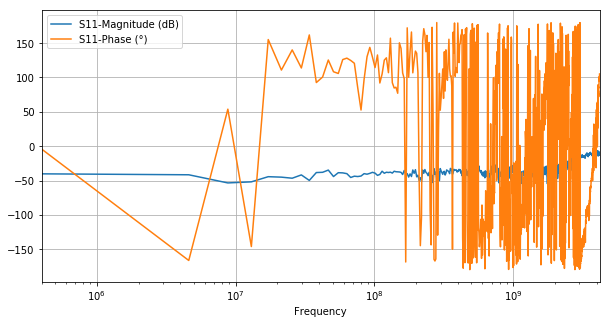

In [42]:
# plot of S vs f; x-axis in log scale.
load_s11.plot(x='Frequency', y=['S11-Magnitude (dB)', 'S11-Phase (°)'], figsize=(10,5), grid=True)
plt.xscale("log")

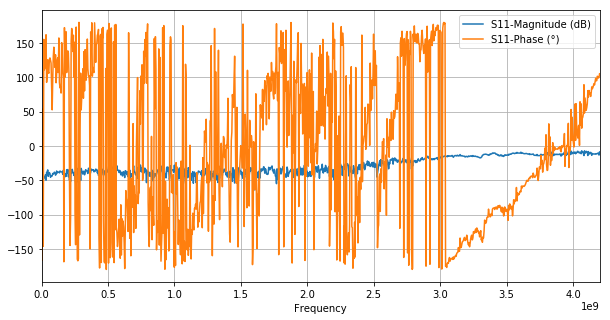

In [43]:
# plot of S vs f; x-axis in linear scale.
load_s11.plot(x='Frequency', y=['S11-Magnitude (dB)', 'S11-Phase (°)'], figsize=(10,5), grid=True)

In [21]:
through_s21 = pd.read_csv('through_s21.csv', sep=';')

In [22]:
through_s21

,Frequency,S11-Magnitude (dB),S11-Phase (°),S12-Magnitude (dB),S12-Phase (°),S21-Magnitude (dB),S21-Phase (°),S22-Magnitude (dB),S22-Phase (°)
0,4.000000e+05,-9.657222,-163.751081,-0.020144,0.391291,0.023527,0.143368,-10.399065,-154.451669
1,4.599600e+06,-9.549551,-179.143605,0.096931,-0.672469,0.074009,-0.679652,-10.293940,-174.757793
2,8.799200e+06,-9.728235,176.985733,0.082610,-0.862466,0.091664,-0.910549,-10.051521,-178.112612
3,1.299880e+07,-9.717732,173.743189,0.073782,-0.881810,0.059327,-0.982472,-10.212263,178.888837
4,1.719840e+07,-9.642811,170.828178,0.077741,-0.892865,0.056924,-1.109299,-10.396730,176.052793
5,2.139800e+07,-9.760598,167.331794,0.047052,-1.054594,0.060206,-1.243159,-10.308309,174.236973
6,2.559760e+07,-9.653856,164.524800,0.041510,-1.400288,0.044828,-1.328424,-10.505568,170.284814
7,2.979720e+07,-9.597771,162.788171,0.048477,-1.225355,0.042126,-1.429870,-10.635671,165.306663
8,3.399680e+07,-9.452124,158.303753,0.052442,-1.242673,0.046792,-1.191062,-10.661154,163.345822
9,3.819640e+07,-9.310557,155.029139,0.047312,-1.270220,0.047329,-1.423769,-10.528227,161.088429


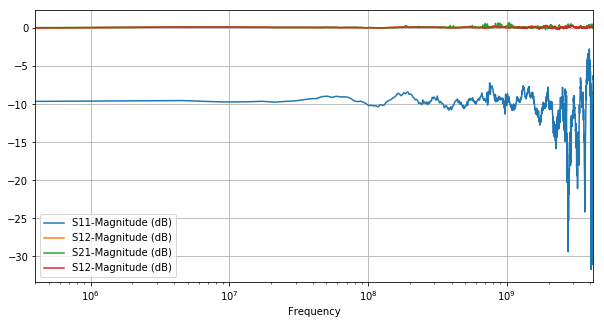

In [44]:
# plot of S vs f; x-axis in log scale.
through_s21.plot(x='Frequency', y=['S11-Magnitude (dB)', 'S12-Magnitude (dB)', 'S21-Magnitude (dB)','S12-Magnitude (dB)'], figsize=(10,5), grid=True)
plt.xscale("log")

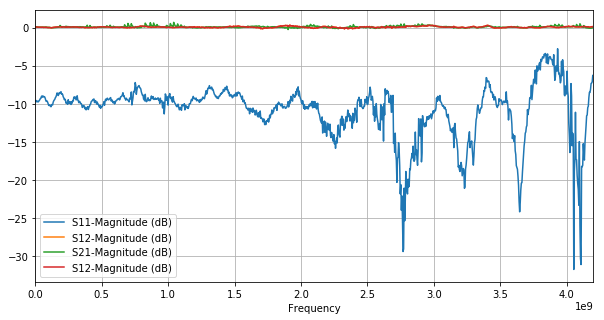

In [45]:
# plot of S vs f; x-axis in linear scale.
through_s21.plot(x='Frequency', y=['S11-Magnitude (dB)', 'S12-Magnitude (dB)', 'S21-Magnitude (dB)','S12-Magnitude (dB)'], figsize=(10,5), grid=True)

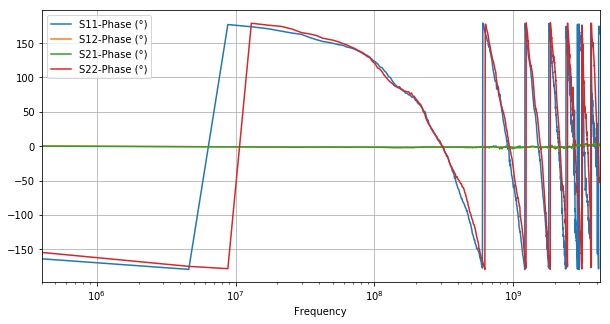

In [46]:
# plot of S vs f; x-axis in log scale.
through_s21.plot(x='Frequency', y=['S11-Phase (°)', 'S12-Phase (°)', 'S21-Phase (°)','S22-Phase (°)'], figsize=(10,5), grid=True)
plt.xscale("log")

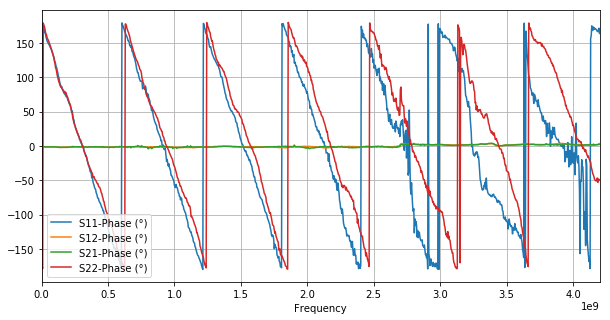

In [47]:
# plot of S vs f; x-axis in linear scale.
through_s21.plot(x='Frequency', y=['S11-Phase (°)', 'S12-Phase (°)', 'S21-Phase (°)','S22-Phase (°)'], figsize=(10,5), grid=True)

In [23]:
LPF_s11 = pd.read_csv('LPF_s11.csv',sep=';')

In [24]:
LPF_s11

,Frequency,S11-Magnitude (dB),S11-Phase (°),S12-Magnitude (dB),S12-Phase (°),S21-Magnitude (dB),S21-Phase (°),S22-Magnitude (dB),S22-Phase (°)
0,4.000000e+05,-10.464515,-167.743184,-0.223984,-1.293231,-0.236877,-1.854814,0,0
1,4.599600e+06,-9.922821,171.116352,-0.184029,-5.818301,-0.220140,-5.821105,0,0
2,8.799200e+06,-10.029886,162.405351,-0.301767,-9.040587,-0.328366,-9.306658,0,0
3,1.299880e+07,-10.109871,153.720754,-0.442409,-12.614066,-0.466955,-12.744017,0,0
4,1.719840e+07,-10.152104,142.747962,-0.542936,-16.326988,-0.583400,-16.428302,0,0
5,2.139800e+07,-10.015193,133.333171,-0.594300,-19.824419,-0.628073,-20.024091,0,0
6,2.559760e+07,-9.741913,125.028671,-0.616097,-23.304242,-0.657535,-23.321242,0,0
7,2.979720e+07,-9.684173,118.590895,-0.576465,-26.079381,-0.656627,-26.391384,0,0
8,3.399680e+07,-9.465956,112.332609,-0.533008,-28.572371,-0.620150,-28.777384,0,0
9,3.819640e+07,-9.148315,104.593245,-0.514961,-30.519334,-0.595299,-30.864110,0,0


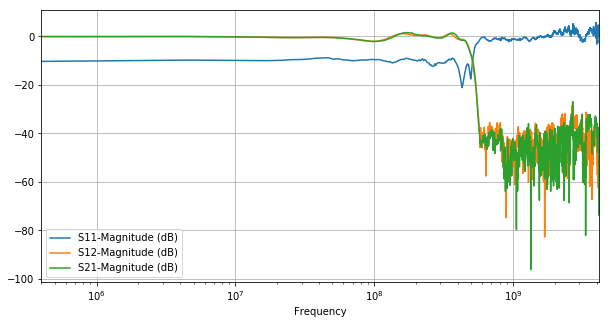

In [49]:
# plot of S vs f; x-axis in log scale.
LPF_s11.plot(x='Frequency', y=['S11-Magnitude (dB)', 'S12-Magnitude (dB)', 'S21-Magnitude (dB)'], figsize=(10,5), grid=True)
plt.xscale("log")

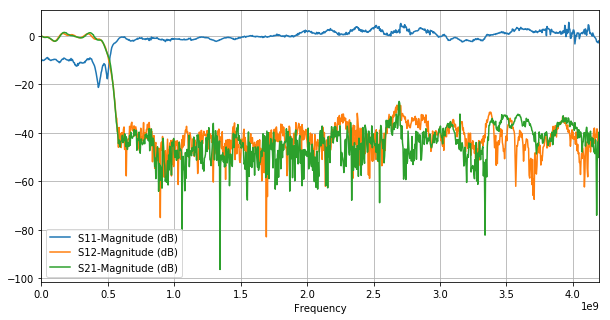

In [50]:
# plot of S vs f; x-axis in linear scale.
LPF_s11.plot(x='Frequency', y=['S11-Magnitude (dB)', 'S12-Magnitude (dB)', 'S21-Magnitude (dB)'], figsize=(10,5), grid=True)

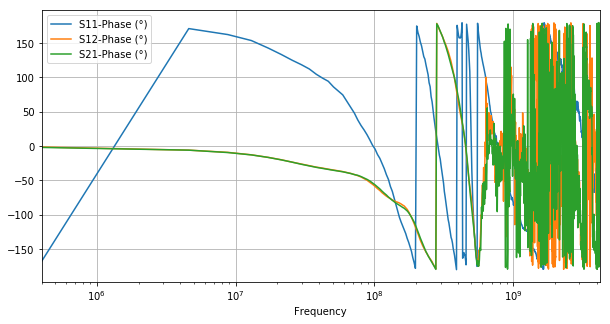

In [51]:
# plot of S vs f; x-axis in log scale.
LPF_s11.plot(x='Frequency', y=['S11-Phase (°)', 'S12-Phase (°)', 'S21-Phase (°)'], figsize=(10,5), grid=True)
plt.xscale("log")

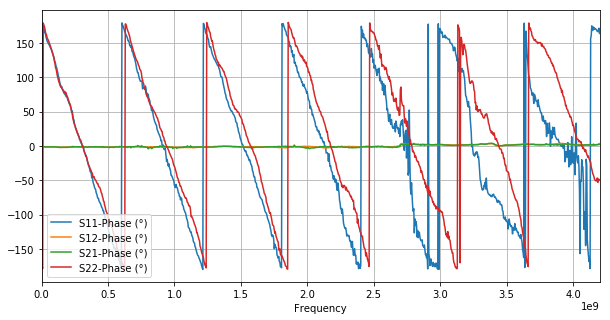

In [52]:
# plot of S vs f; x-axis in linear scale.
through_s21.plot(x='Frequency', y=['S11-Phase (°)', 'S12-Phase (°)', 'S21-Phase (°)','S22-Phase (°)'], figsize=(10,5), grid=True)